In [ ]:
# Import Necessary Libraries
import time
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization, GlobalAveragePooling2D
from keras.optimizers import SGD, Adam

## **Model building and training**

Epoch 1/10
147/147 [==============================] - 59s 388ms/step - loss: 18.0439 - accuracy: 0.4819
Epoch 2/10
147/147 [==============================] - 58s 395ms/step - loss: 13.0673 - accuracy: 0.6571
Epoch 3/10
147/147 [==============================] - 58s 391ms/step - loss: 9.5537 - accuracy: 0.7114
Epoch 4/10
147/147 [==============================] - 58s 393ms/step - loss: 7.4583 - accuracy: 0.7511
Epoch 5/10
147/147 [==============================] - 58s 391ms/step - loss: 6.6363 - accuracy: 0.7671
Epoch 6/10
147/147 [==============================] - 57s 390ms/step - loss: 5.1062 - accuracy: 0.8009
Epoch 7/10
147/147 [==============================] - 57s 390ms/step - loss: 4.5034 - accuracy: 0.8018
Epoch 8/10
147/147 [==============================] - 58s 396ms/step - loss: 4.4541 - accuracy: 0.7986
Epoch 9/10
147/147 [==============================] - 58s 391ms/step - loss: 2.9288 - accuracy: 0.8321
Epoch 10/10
147/147 [==============================] - 58s 392ms/step -

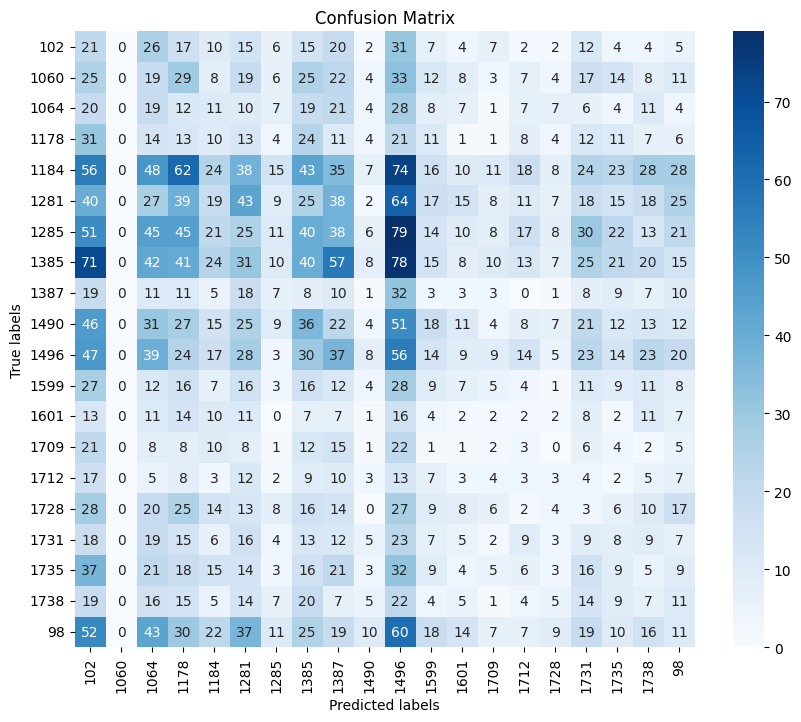

In [ ]:
# Model with ReLU
from keras.layers import ReLU

def main():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(224,224,3)))
  model.add(ReLU())
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, kernel_size=3, padding='same'))
  model.add(ReLU())
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2))
  model.add(Dropout(0.2))

  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(ReLU())
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(num_classes,activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  start_time = time.time() # Start time

  model.fit(train_generator,steps_per_epoch=train_generator.samples // train_generator.batch_size,epochs=10)

  end_time = time.time() # End time
  duration = end_time - start_time # Duration
  print(f"Training the model took {duration:.2f} seconds.")

  # Evaluate the model
  start_time = time.time() # Start time
  test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
  print("Test Accuracy:", test_acc * 100 , "%")
  print('Test Loss:',test_loss)
  end_time = time.time() # End time
  duration = end_time - start_time # Duration
  print(f"Evaluating the model took {duration:.2f} seconds.")

  print("========================================")
  y_pred = np.argmax(model.predict(test_generator), axis=1)
  y_true = test_generator.classes
  f1 = f1_score(y_true, y_pred, average='weighted')
  cm = confusion_matrix(y_true, y_pred)
  print(f"F1 Score: {f1}")
  # print(f"Confusion Matrix: {cm}")
  print("========================================")
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

main()

Epoch 1/10
147/147 [==============================] - 59s 390ms/step - loss: 17.6842 - accuracy: 0.5040
Epoch 2/10
147/147 [==============================] - 58s 392ms/step - loss: 11.8839 - accuracy: 0.6579
Epoch 3/10
147/147 [==============================] - 58s 392ms/step - loss: 9.0757 - accuracy: 0.7091
Epoch 4/10
147/147 [==============================] - 58s 391ms/step - loss: 8.3585 - accuracy: 0.7381
Epoch 5/10
147/147 [==============================] - 58s 394ms/step - loss: 6.6789 - accuracy: 0.7549
Epoch 6/10
147/147 [==============================] - 58s 393ms/step - loss: 5.6487 - accuracy: 0.7852
Epoch 7/10
147/147 [==============================] - 57s 388ms/step - loss: 4.5099 - accuracy: 0.8016
Epoch 8/10
147/147 [==============================] - 58s 395ms/step - loss: 3.9883 - accuracy: 0.8073
Epoch 9/10
147/147 [==============================] - 57s 390ms/step - loss: 3.5348 - accuracy: 0.8135
Epoch 10/10
147/147 [==============================] - 59s 399ms/step -

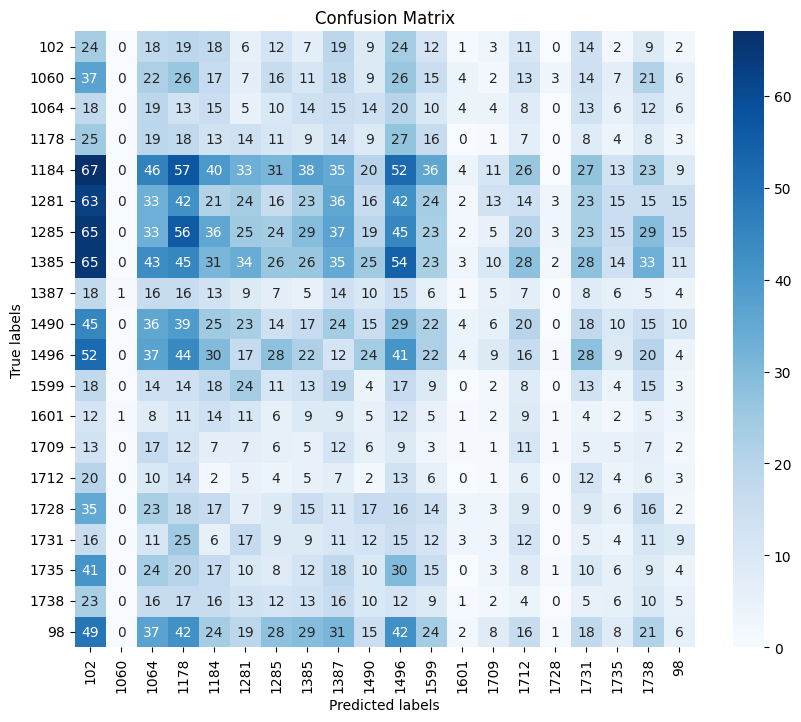

In [ ]:
# Model with LeakyReLU
from keras.layers import LeakyReLU

def main():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(224,224,3)))
  model.add(LeakyReLU(alpha=0.1))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, kernel_size=3, padding='same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2))
  model.add(Dropout(0.2))

  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(LeakyReLU(alpha=0.1))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2))
  model.add(Dropout(0.2))


  model.add(Flatten())
  model.add(Dense(num_classes,activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  start_time = time.time() # Start time

  model.fit(train_generator,steps_per_epoch=train_generator.samples // train_generator.batch_size,epochs=10)

  end_time = time.time() # End time
  duration = end_time - start_time # Duration
  print(f"Training the model took {duration:.2f} seconds.")

  # Evaluate the model
  start_time = time.time() # Start time
  test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
  print("Test Accuracy:", test_acc * 100 , "%")
  print('Test Loss:',test_loss)
  end_time = time.time() # End time
  duration = end_time - start_time # Duration
  print(f"Evaluating the model took {duration:.2f} seconds.")

  print("========================================")
  y_pred = np.argmax(model.predict(test_generator), axis=1)
  y_true = test_generator.classes
  f1 = f1_score(y_true, y_pred, average='weighted')
  cm = confusion_matrix(y_true, y_pred)
  print(f"F1 Score: {f1}")
  # print(f"Confusion Matrix: {cm}")
  print("========================================")
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

main()

Epoch 1/10
147/147 [==============================] - 62s 395ms/step - loss: 17.5921 - accuracy: 0.4770
Epoch 2/10
147/147 [==============================] - 58s 393ms/step - loss: 14.3528 - accuracy: 0.6104
Epoch 3/10
147/147 [==============================] - 58s 391ms/step - loss: 10.3765 - accuracy: 0.6848
Epoch 4/10
147/147 [==============================] - 58s 396ms/step - loss: 9.4045 - accuracy: 0.7104
Epoch 5/10
147/147 [==============================] - 58s 394ms/step - loss: 7.1777 - accuracy: 0.7519
Epoch 6/10
147/147 [==============================] - 59s 397ms/step - loss: 5.9072 - accuracy: 0.7728
Epoch 7/10
147/147 [==============================] - 58s 397ms/step - loss: 4.3804 - accuracy: 0.7997
Epoch 8/10
147/147 [==============================] - 58s 395ms/step - loss: 3.9415 - accuracy: 0.8148
Epoch 9/10
147/147 [==============================] - 58s 392ms/step - loss: 3.5428 - accuracy: 0.8182
Epoch 10/10
147/147 [==============================] - 57s 390ms/step 

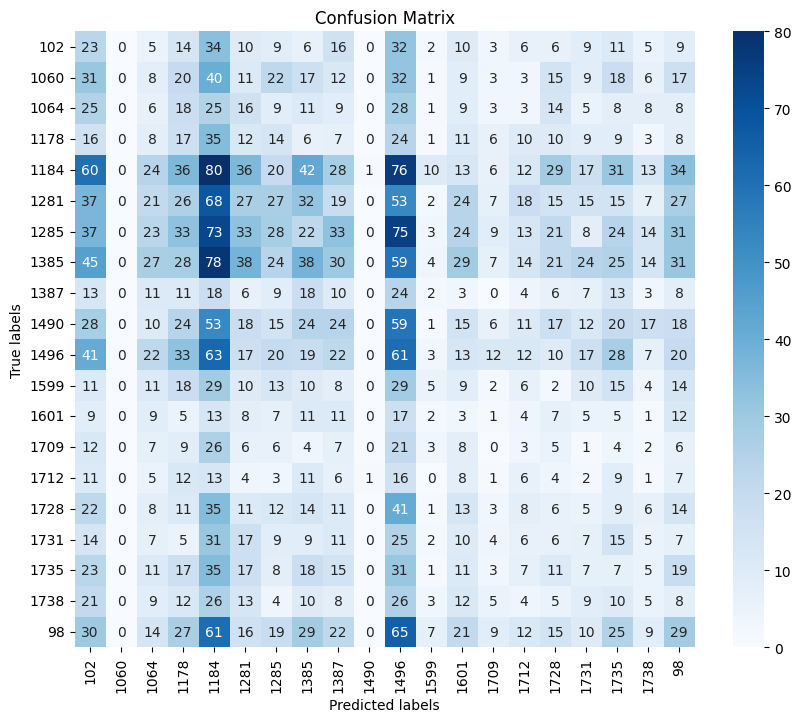

In [ ]:
# Model with ELU
from keras.layers import ELU


def main():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(224,224,3)))
  model.add(ELU())
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2))
  model.add(Dropout(0.2))

  model.add(Conv2D(64, kernel_size=3, padding='same'))
  model.add(ELU())
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2))
  model.add(Dropout(0.2))

  model.add(Conv2D(128, kernel_size=5, padding='same'))
  model.add(ELU())
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2))
  model.add(Dropout(0.2))


  model.add(Flatten())
  model.add(Dense(num_classes,activation='softmax'))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  start_time = time.time() # Start time

  model.fit(train_generator,steps_per_epoch=train_generator.samples // train_generator.batch_size,epochs=10)

  end_time = time.time() # End time
  duration = end_time - start_time # Duration
  print(f"Training the model took {duration:.2f} seconds.")

  # Evaluate the model
  start_time = time.time() # Start time
  test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
  print("Test Accuracy:", test_acc * 100 , "%")
  print('Test Loss:',test_loss)
  end_time = time.time() # End time
  duration = end_time - start_time # Duration
  print(f"Evaluating the model took {duration:.2f} seconds.")

  print("========================================")
  y_pred = np.argmax(model.predict(test_generator), axis=1)
  y_true = test_generator.classes
  f1 = f1_score(y_true, y_pred, average='weighted')
  cm = confusion_matrix(y_true, y_pred)
  print(f"F1 Score: {f1}")
  # print(f"Confusion Matrix: {cm}")
  print("========================================")
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

main()

# **Hyper-parameter tuning through WandB**

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Import Necessary Libraries
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score
import wandb
from wandb.keras import WandbCallback

# Log in to WandB
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Define Callback class
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs=None):
        x, y_true = self.test_data
        y_pred = np.argmax(self.model.predict(x), axis=1)
        cm = confusion_matrix(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='macro')
        wandb.log({"F1 Score": f1, "Confusion Matrix": wandb.plot.confusion_matrix(probs=None, y_true=y_true, preds=y_pred)})

def main():
    # Initialize WandB
    wandb.init()
    # Initialize config
    config = wandb.config

    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(224,224,3)))
    model.add(ELU(alpha=1.0))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2))
    model.add(Dropout(config.drop_out))

    model.add(Conv2D(64, kernel_size=3, padding='same'))
    model.add(ELU(alpha=1.0))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2))
    model.add(Dropout(config.drop_out))

    model.add(Conv2D(128, kernel_size=5, padding='same'))
    model.add(ELU(alpha=1.0))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2))
    model.add(Dropout(config.drop_out))

    model.add(Flatten())
    model.add(Dense(config.num_classes, activation='softmax'))

    # Compile the model with the specified learning rate
    optimizer = Adam(learning_rate=config.learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    start_time = time.time() # Start time

    model.fit(train_generator, epochs=10, callbacks=[WandbCallback(), MetricsCallback((test_generator, test_generator.classes))])

    end_time = time.time() # End time
    duration = end_time - start_time # Duration
    print(f"Training the model took {duration:.2f} seconds.")

    # Evaluate the model
    start_time = time.time() # Start time
    test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
    wandb.log({"Test Accuracy": test_acc, "Test Loss": test_loss})
    print("Test Accuracy:", test_acc * 100 , "%")
    print('Test Loss:',test_loss)
    end_time = time.time() # End time
    duration = end_time - start_time # Duration
    print(f"Evaluating the model took {duration:.2f} seconds.")

# Define the sweep configuration
sweep_config = {
    'method': 'grid',
    'parameters': {
        'drop_out': {
            'values': [0.2, 0.3]
        },
        'learning_rate': {
            'values': [0.01, 0.001]
        },
        'num_classes': {
            'values': [num_classes]
        },
        'batch_size': {
            'values': [32, 64]
        }
    }
}

# Initialize sweep by passing in the config
sweep_id = wandb.sweep(sweep_config, project="BA865_Gesture_Recognition_Final")

# Start sweep job
wandb.agent(sweep_id, function=main)

# Finish sweep job
wandb.finish()

Create sweep with ID: ijqyfi3z
Sweep URL: https://wandb.ai/alyssachen/BA865_Gesture_Recognition_Final/sweeps/ijqyfi3z


wandb: Agent Starting Run: z42cwl1q with config:
wandb: 	batch_size: 32
wandb: 	drop_out: 0.2
wandb: 	learning_rate: 0.01
wandb: 	num_classes: 20
wandb: Currently logged in as: ethanch (alyssachen). Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
148/148 [==============================] - 4034s 27s/step - loss: 93.6113 - accuracy: 0.5216
Epoch 2/10
148/148 [==============================] - 76s 513ms/step - loss: 10.8107 - accuracy: 0.6905
Epoch 3/10
148/148 [==============================] - 76s 511ms/step - loss: 1.0239 - accuracy: 0.7572
Epoch 4/10
148/148 [==============================] - 76s 513ms/step - loss: 0.7398 - accuracy: 0.7771
Epoch 5/10
148/148 [==============================] - 76s 512ms/step - loss: 0.6219 - accuracy: 0.7860
Epoch 6/10
148/148 [==============================] - 75s 509ms/step - loss: 0.5186 - accuracy: 0.8063
Epoch 7/10
148/148 [==============================] - 77s 520ms/step - loss: 0.5293 - accuracy: 0.8033
Epoch 8/10
148/148 [==============================] - 76s 515ms/step - loss: 0.4951 - accuracy: 0.8086
Epoch 9/10
148/148 [==============================] - 76s 511ms/step - loss: 0.4375 - accuracy: 0.8215
Epoch 10/10
148/148 [==============================] - 75s 508ms/step -

F1 Score,▁▅▇▇█▇▅▅▇▆
Test Accuracy,▁
Test Loss,▁
accuracy,▁▅▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▁▁▁▁▁▁▁▁
F1 Score,0.04002
Test Accuracy,0.52135
Test Loss,2.49721
accuracy,0.80737
epoch,9


wandb: Agent Starting Run: jyh3rdm5 with config:
wandb: 	batch_size: 32
wandb: 	drop_out: 0.2
wandb: 	learning_rate: 0.001
wandb: 	num_classes: 20


Epoch 1/10
148/148 [==============================] - 77s 509ms/step - loss: 19.9460 - accuracy: 0.4600
Epoch 2/10
148/148 [==============================] - 76s 511ms/step - loss: 14.0524 - accuracy: 0.6012
Epoch 3/10
148/148 [==============================] - 76s 517ms/step - loss: 11.1072 - accuracy: 0.6723
Epoch 4/10
148/148 [==============================] - 77s 519ms/step - loss: 8.2012 - accuracy: 0.7174
Epoch 5/10
148/148 [==============================] - 76s 512ms/step - loss: 7.2493 - accuracy: 0.7534
Epoch 6/10
148/148 [==============================] - 76s 513ms/step - loss: 6.0926 - accuracy: 0.7735
Epoch 7/10
148/148 [==============================] - 76s 517ms/step - loss: 5.1451 - accuracy: 0.7811
Epoch 8/10
148/148 [==============================] - 76s 516ms/step - loss: 4.7729 - accuracy: 0.7932
Epoch 9/10
148/148 [==============================] - 76s 513ms/step - loss: 4.0189 - accuracy: 0.8004
Epoch 10/10
148/148 [==============================] - 76s 515ms/step 

F1 Score,▂▁▄▇█▇▇▇█▇
Test Accuracy,▁
Test Loss,▁
accuracy,▁▄▅▆▇▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▃▂▂▁▁▁
F1 Score,0.04228
Test Accuracy,0.49427
Test Loss,15.20911
accuracy,0.8116
epoch,9


wandb: Agent Starting Run: 1uqw27pd with config:
wandb: 	batch_size: 32
wandb: 	drop_out: 0.3
wandb: 	learning_rate: 0.01
wandb: 	num_classes: 20


Epoch 1/10
148/148 [==============================] - 77s 509ms/step - loss: 95.1914 - accuracy: 0.4970
Epoch 2/10
148/148 [==============================] - 76s 511ms/step - loss: 8.4427 - accuracy: 0.6723
Epoch 3/10
148/148 [==============================] - 76s 514ms/step - loss: 0.7670 - accuracy: 0.7439
Epoch 4/10
148/148 [==============================] - 76s 514ms/step - loss: 0.9287 - accuracy: 0.7367
Epoch 5/10
148/148 [==============================] - 75s 509ms/step - loss: 0.7657 - accuracy: 0.7674
Epoch 6/10
148/148 [==============================] - 76s 514ms/step - loss: 0.5832 - accuracy: 0.7796
Epoch 7/10
148/148 [==============================] - 76s 513ms/step - loss: 0.6150 - accuracy: 0.7824
Epoch 8/10
148/148 [==============================] - 75s 510ms/step - loss: 0.5250 - accuracy: 0.7964
Epoch 9/10
148/148 [==============================] - 75s 510ms/step - loss: 0.5663 - accuracy: 0.7938
Epoch 10/10
148/148 [==============================] - 75s 509ms/step - 

F1 Score,▁▆▅▇▇▇▇█▇▇
Test Accuracy,▁
Test Loss,▁
accuracy,▁▅▇▇▇████▇
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▁▁▁▁▁▁▁▁
F1 Score,0.04298
Test Accuracy,0.50625
Test Loss,2.15009
accuracy,0.76799
epoch,9


wandb: Agent Starting Run: 8wfy74ef with config:
wandb: 	batch_size: 32
wandb: 	drop_out: 0.3
wandb: 	learning_rate: 0.001
wandb: 	num_classes: 20


Epoch 1/10
148/148 [==============================] - 77s 511ms/step - loss: 18.3125 - accuracy: 0.4562
Epoch 2/10
148/148 [==============================] - 76s 517ms/step - loss: 12.5195 - accuracy: 0.6016
Epoch 3/10
148/148 [==============================] - 75s 509ms/step - loss: 10.3663 - accuracy: 0.6734
Epoch 4/10
148/148 [==============================] - 77s 518ms/step - loss: 9.0620 - accuracy: 0.6962
Epoch 5/10
148/148 [==============================] - 76s 511ms/step - loss: 7.3149 - accuracy: 0.7250
Epoch 6/10
148/148 [==============================] - 76s 512ms/step - loss: 6.1543 - accuracy: 0.7498
Epoch 7/10
148/148 [==============================] - 75s 510ms/step - loss: 5.1948 - accuracy: 0.7720
Epoch 8/10
148/148 [==============================] - 77s 520ms/step - loss: 3.8845 - accuracy: 0.7970
Epoch 9/10
148/148 [==============================] - 77s 517ms/step - loss: 3.0772 - accuracy: 0.8072
Epoch 10/10
148/148 [==============================] - 77s 517ms/step 

F1 Score,▁▁▆▆▇▆▅▆█▇
Test Accuracy,▁
Test Loss,▁
accuracy,▁▄▅▆▆▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▄▃▂▂▁▁▁
F1 Score,0.04282
Test Accuracy,0.43437
Test Loss,15.48591
accuracy,0.80483
epoch,9


wandb: Agent Starting Run: uiggyaiq with config:
wandb: 	batch_size: 64
wandb: 	drop_out: 0.2
wandb: 	learning_rate: 0.01
wandb: 	num_classes: 20


Epoch 1/10
148/148 [==============================] - 79s 517ms/step - loss: 100.2015 - accuracy: 0.4987
Epoch 2/10
148/148 [==============================] - 75s 508ms/step - loss: 6.4404 - accuracy: 0.6928
Epoch 3/10
148/148 [==============================] - 76s 512ms/step - loss: 0.8669 - accuracy: 0.7337
Epoch 4/10
148/148 [==============================] - 77s 519ms/step - loss: 0.6592 - accuracy: 0.7741
Epoch 5/10
148/148 [==============================] - 76s 515ms/step - loss: 0.5844 - accuracy: 0.7826
Epoch 6/10
148/148 [==============================] - 76s 513ms/step - loss: 0.5836 - accuracy: 0.7972
Epoch 7/10
148/148 [==============================] - 76s 512ms/step - loss: 0.5306 - accuracy: 0.7961
Epoch 8/10
148/148 [==============================] - 76s 517ms/step - loss: 0.4919 - accuracy: 0.8150
Epoch 9/10
148/148 [==============================] - 76s 514ms/step - loss: 0.4825 - accuracy: 0.8105
Epoch 10/10
148/148 [==============================] - 76s 516ms/step -

F1 Score,▁▅▅▇█▆▆▇▇▆
Test Accuracy,▁
Test Loss,▁
accuracy,▁▅▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▁▁▁▁▁▁▁▁▁
F1 Score,0.04287
Test Accuracy,0.51736
Test Loss,2.31674
accuracy,0.80377
epoch,9


wandb: Agent Starting Run: p5aw6sk1 with config:
wandb: 	batch_size: 64
wandb: 	drop_out: 0.2
wandb: 	learning_rate: 0.001
wandb: 	num_classes: 20


Epoch 1/10
148/148 [==============================] - 77s 505ms/step - loss: 18.5404 - accuracy: 0.4784
Epoch 2/10
148/148 [==============================] - 76s 516ms/step - loss: 14.4478 - accuracy: 0.6088
Epoch 3/10
148/148 [==============================] - 76s 515ms/step - loss: 10.2727 - accuracy: 0.6945
Epoch 4/10
148/148 [==============================] - 76s 511ms/step - loss: 9.1618 - accuracy: 0.7091
Epoch 5/10
148/148 [==============================] - 76s 511ms/step - loss: 6.9945 - accuracy: 0.7477
Epoch 6/10
148/148 [==============================] - 77s 518ms/step - loss: 5.1440 - accuracy: 0.7801
Epoch 7/10
148/148 [==============================] - 77s 519ms/step - loss: 5.1815 - accuracy: 0.7955
Epoch 8/10
148/148 [==============================] - 77s 518ms/step - loss: 4.2132 - accuracy: 0.8063
Epoch 9/10
148/148 [==============================] - 76s 515ms/step - loss: 3.4922 - accuracy: 0.8222
Epoch 10/10
148/148 [==============================] - 77s 523ms/step 

F1 Score,▂▁▅▇█▇█▇██
Test Accuracy,▁
Test Loss,▁
accuracy,▁▄▅▆▆▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▄▃▂▂▁▁▁
F1 Score,0.04478
Test Accuracy,0.51562
Test Loss,18.0484
accuracy,0.82684
epoch,9


wandb: Agent Starting Run: cnomg3pb with config:
wandb: 	batch_size: 64
wandb: 	drop_out: 0.3
wandb: 	learning_rate: 0.01
wandb: 	num_classes: 20


Epoch 1/10
148/148 [==============================] - 78s 518ms/step - loss: 99.2302 - accuracy: 0.5135
Epoch 2/10
148/148 [==============================] - 77s 521ms/step - loss: 7.7192 - accuracy: 0.7009
Epoch 3/10
148/148 [==============================] - 77s 522ms/step - loss: 1.0877 - accuracy: 0.7284
Epoch 4/10
148/148 [==============================] - 76s 516ms/step - loss: 0.7629 - accuracy: 0.7475
Epoch 5/10
148/148 [==============================] - 76s 514ms/step - loss: 1.0734 - accuracy: 0.7508
Epoch 6/10
148/148 [==============================] - 78s 525ms/step - loss: 0.5556 - accuracy: 0.7906
Epoch 7/10
148/148 [==============================] - 76s 511ms/step - loss: 0.5171 - accuracy: 0.8017
Epoch 8/10
148/148 [==============================] - 76s 516ms/step - loss: 0.5242 - accuracy: 0.8021
Epoch 9/10
148/148 [==============================] - 76s 513ms/step - loss: 0.4909 - accuracy: 0.8127
Epoch 10/10
148/148 [==============================] - 76s 511ms/step - 

F1 Score,▁▂▃▄█▅█▇▇▇
Test Accuracy,▁
Test Loss,▁
accuracy,▁▅▆▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▁▁▁▁▁▁▁▁
F1 Score,0.04181
Test Accuracy,0.46545
Test Loss,2.48487
accuracy,0.8116
epoch,9


wandb: Agent Starting Run: tlnmm9wp with config:
wandb: 	batch_size: 64
wandb: 	drop_out: 0.3
wandb: 	learning_rate: 0.001
wandb: 	num_classes: 20


Epoch 1/10
148/148 [==============================] - 79s 518ms/step - loss: 17.8289 - accuracy: 0.4829
Epoch 2/10
148/148 [==============================] - 76s 514ms/step - loss: 13.4878 - accuracy: 0.6166
Epoch 3/10
148/148 [==============================] - 79s 536ms/step - loss: 10.3439 - accuracy: 0.6759
Epoch 4/10
148/148 [==============================] - 77s 519ms/step - loss: 7.8649 - accuracy: 0.7267
Epoch 5/10
148/148 [==============================] - 76s 514ms/step - loss: 6.6471 - accuracy: 0.7439
Epoch 6/10
148/148 [==============================] - 77s 519ms/step - loss: 5.8945 - accuracy: 0.7570
Epoch 7/10
148/148 [==============================] - 76s 515ms/step - loss: 4.7757 - accuracy: 0.8014
Epoch 8/10
148/148 [==============================] - 76s 512ms/step - loss: 3.9328 - accuracy: 0.8076
Epoch 9/10
148/148 [==============================] - 76s 515ms/step - loss: 3.6613 - accuracy: 0.8084
Epoch 10/10
148/148 [==============================] - 76s 514ms/step 

F1 Score,▁▁▇▇▆▇▆▆██
Test Accuracy,▁
Test Loss,▁
accuracy,▁▄▅▆▆▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▃▂▂▁▁▁
F1 Score,0.04437
Test Accuracy,0.47448
Test Loss,15.45501
accuracy,0.81943
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.
